<a href="https://colab.research.google.com/github/hariomvyas/MLProjects/blob/main/Titanic_LogisticRegression_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with Logistic Regression and SVM

We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification: survival or deceased.

 - **Variable Name -  Variable Description**
 - PassengerID - Passenger ID          
 - Survived - Survival (0 = No; 1 = Yes)
 - Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
 - Name	- Name
 - Sex - Sex
 - Age - Age in years
 - SibSp - Number of Siblings/Spouses Aboard
 - Parch - Number of Parents/Children Aboard
 - Ticket - Ticket Number
 - Fare - Passenger Fare
 - Cabin - Cabin number
 - Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### a. Import Libraries

Import all necessary libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibrationDisplay
from sklearn.impute import SimpleImputer

import numpy as np

Our target variable will be **survived**.  Use the rest of the fields mentioned above to predict whether a passenger survived the Titanic shipwreck.

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the `pandas.read_csv` function. The ‘df_test.csv’ has been preprocessed (i.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the dataframe into X_test and y_test.  The ‘df_train’ data has NOT been preprocessed and you will need to preprocess and prepare the ‘df_train’ dataframe. Note: Neither df_train nor df_test have been scaled. The next few steps will enumerate data preprocessing, scaling requirements we need to perform.

In [ ]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

2. The resulting dataframe (i.e., df_train) should have the shape (712,12) indicating that there are 712 instances and 12 columns.

In [ ]:
df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,1
1,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
2,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
3,542,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,0
4,557,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...
707,576,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S,0
708,145,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S,0
709,551,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,1
710,58,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C,0


3. In df_train dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

In [ ]:
df_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

4. Use the `pandas.isnull().sum()` function to check if there are any missing values in the df_train dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.

In [ ]:
print(df_train.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64


5. Use the `pandas.DataFrame.drop()` function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns.

In [ ]:
df_train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


6. Use the `pandas.DataFrame.fillna()` function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called **imputation** (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general.  
Use the `dropna()` function to drop any remaining **rows** that consist of NA values.

In [ ]:
imputer = SimpleImputer(strategy='mean')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])


df_train.dropna(inplace=True)

7. Your task is to use the feature columns to predict the target column. This can be cast as a classification problem.  
8. Create a pandas dataframe X_train of features (by dropping the ‘Survival’ column from the df_train dataframe). Create a pandas Series object of targets y_train (by only considering the ‘Survival’ column from the df_train dataframe). Moving forward, we will be working with X_train and y_train. At this point, also split the df_test into X_test and y_test by dropping the ‘Survival’ column and storing the features into X_test. Store the ‘Survival’ column in y_test.

In [ ]:
# Split df_train into X_train and y_train
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

# Split df_test into X_test and y_test
X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

#### ii. Data Visualization

1. Employ a scatter plot using `matplotlib.pyplot.scatter` between the age of the passengers and the price of their fare. Label the x-axis and the y-axis and also give the plot a title.

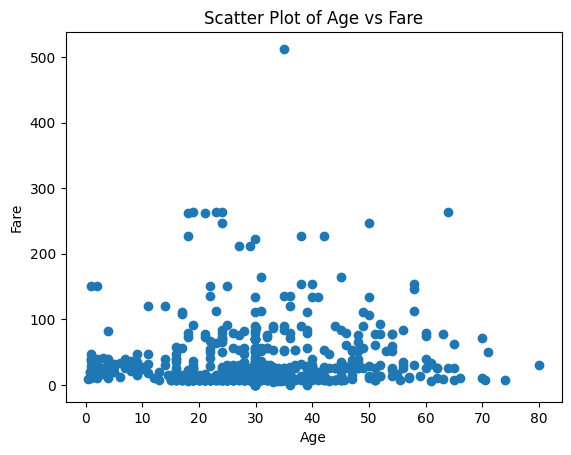

In [ ]:
# Scatter plot of Age vs Fare
plt.scatter(df_train['Age'], df_train['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

In [ ]:
# a. Find the highest and lowest fare price
highest_fare = df_train['Fare'].max()
lowest_fare = df_train['Fare'].min()

# b. Find the mean values of the 'Age' and 'Fare' features
mean_age = df_train['Age'].mean()
mean_fare = df_train['Fare'].mean()

# c. Find the age of the oldest passenger
oldest_age = df_train['Age'].max()

print(f"The highest fare is: {highest_fare}")
print(f"The lowest fare is: {lowest_fare}")
print(f"The mean age is: {mean_age}")
print(f"The mean fare is: {mean_fare}")
print(f"The age of the oldest passenger is: {oldest_age}")

The highest fare is: 512.3292
The lowest fare is: 0.0
The mean age is: 29.75497865240222
The mean fare is: 32.52509295774648
The age of the oldest passenger is: 80.0


2. Use the df_train dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using `matplotlib.pyplot.bar` (Passenger Class column)

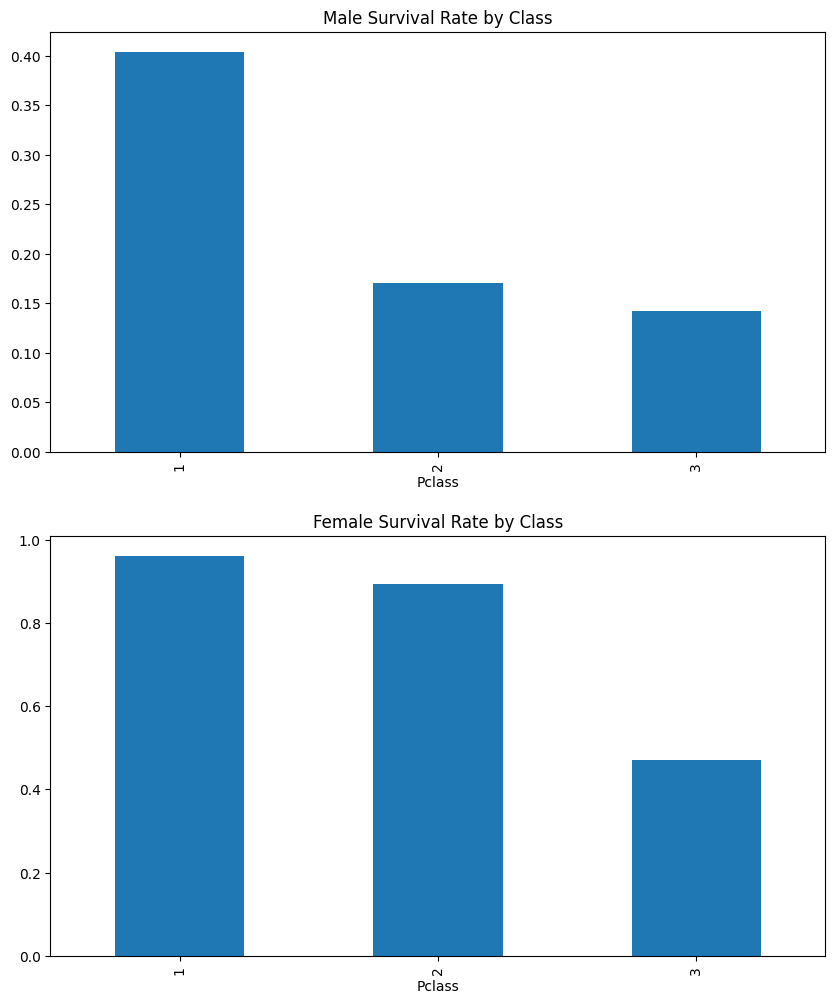

In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(10, 12))
df_train[df_train['Sex'] == 'male'].groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=ax[0])
df_train[df_train['Sex'] == 'female'].groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=ax[1])
ax[0].set_title('Male Survival Rate by Class')
ax[1].set_title('Female Survival Rate by Class')
plt.show()

In [ ]:

male_survivors_by_class = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)].groupby('Pclass')['Survived'].count()
least_survived_male_class = male_survivors_by_class.idxmin()
least_survived_males = male_survivors_by_class.min()


female_survivors_by_class = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)].groupby('Pclass')['Survived'].count()
least_survived_female_class = female_survivors_by_class.idxmin()
least_survived_females = female_survivors_by_class.min()


most_survived_male_class = male_survivors_by_class.idxmax()
most_survived_males = male_survivors_by_class.max()


most_survived_female_class = female_survivors_by_class.idxmax()
most_survived_females = female_survivors_by_class.max()

print(f"Least number of survived males was in class {least_survived_male_class} with {least_survived_males} survivors.")
print(f"Least number of survived females was in class {least_survived_female_class} with {least_survived_females} survivors.")
print(f"Greatest number of survived males was in class {most_survived_male_class} with {most_survived_males} survivors.")
print(f"Greatest number of survived females was in class {most_survived_female_class} with {most_survived_females} survivors.")

Least number of survived males was in class 2 with 15 survivors.
Least number of survived females was in class 2 with 50 survivors.
Greatest number of survived males was in class 1 with 42 survivors.
Greatest number of survived females was in class 1 with 74 survivors.


3. Using the Target variable (Survived) in y_train plot a bar chart showing the distribution of the ‘Survived’ column.

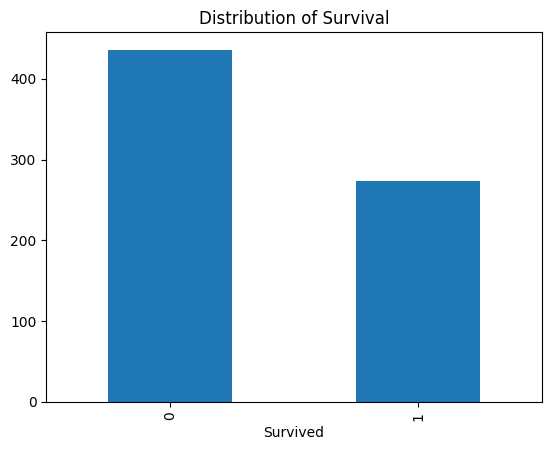

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.title('Distribution of Survival')
plt.show()

4. So far you should have successfully been able to load, preprocess and visualize your data. Use the `pd.get_dummies()` function to convert categorical data into dummy variables (‘Sex’ and ‘Embarked’). Make sure to pass `drop_first=True` to the `get_dummies()` function. (Perform this only on X_train and store the result back into X_train).

In [ ]:
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
X_train.shape

(710, 8)

#### iii. Data Scaling

1. Use MinMaxScaler to scale only the **continuous attributes** of X_train. Apply the `fit_transform()` function of the scaler to obtain the scaled data and store it back in X_train.

2. Scale the X_test using the scaler you have just fit, this time using the `transform()` function. Note: Store the scaled values back into X_test. At the end of this step, you must have X_train, X_test, all scaled according to the MinMaxScaler.

In [ ]:
scaler = MinMaxScaler()
X_train[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X_train[['Age', 'SibSp', 'Parch', 'Fare']])
X_test[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(X_test[['Age', 'SibSp', 'Parch', 'Fare']])

### c. Modelling

#### i. Modelling (Model Instantiation / Training) using Logistic Regression classifier

1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’  

In [ ]:
model_lr = LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [ ]:
model_lr.fit(X_train, y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [ ]:
y_pred_lr = model_lr.predict(X_test)

4. Employ the `accuracy_score` function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model.

In [ ]:
print("Accuracy of Logistic Regression model:", accuracy_score(y_test, y_pred_lr))

Accuracy of Logistic Regression model: 0.88268156424581


#### ii. Modelling Logistic Regression Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20`, `df_train_noise40`, and `df_train_noise60`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20` we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable.

**Repeat the following steps (c. i. 1 – 4) for the 20%, 40%, 60% noise level datasets.**  
Train a new Logistic Regression model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label this model as `model_lr_noise_<nl>`. Specifically, do the following:
1. Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as `model_lr_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data.
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_lr_noise<nl>`.
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model.

In [ ]:

def train_noisy_model(noise_level):
    df_train_noisy = pd.read_csv(f'df_train_noise{noise_level}.csv')
    X_train_noisy = df_train_noisy.drop('Survived', axis=1)
    y_train_noisy = df_train_noisy['Survived']
    model_lr_noise = LogisticRegression()
    model_lr_noise.fit(X_train_noisy, y_train_noisy)
    y_pred_lr_noise = model_lr_noise.predict(X_test)
    print(f"Accuracy of model with {noise_level}% noise:", accuracy_score(y_test, y_pred_lr_noise))

train_noisy_model(20)
train_noisy_model(40)
train_noisy_model(60)

Accuracy of model with 20% noise: 0.7039106145251397
Accuracy of model with 40% noise: 0.6312849162011173
Accuracy of model with 60% noise: 0.39664804469273746


### d. Evaluation

#### i. Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1. Use `classification_report()` function from sklearn.metrics to report the precision, recall, and f1 score for each class for the `model_lr` model, along with a confusion matrix.

In [ ]:
# Classification report and confusion matrix
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       113
           1       0.86      0.82      0.84        66

    accuracy                           0.88       179
   macro avg       0.88      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179

[[104   9]
 [ 12  54]]


#### ii. Report the accuracy and classification report for each of the three noisy models (`model_lr_noise<nl>`)

In [ ]:

def evaluate_noisy_model(noise_level):
    df_train_noisy = pd.read_csv(f'df_train_noise{noise_level}.csv')
    X_train_noisy = df_train_noisy.drop('Survived', axis=1)
    y_train_noisy = df_train_noisy['Survived']
    model_lr_noise = LogisticRegression()
    model_lr_noise.fit(X_train_noisy, y_train_noisy)
    y_pred_lr_noise = model_lr_noise.predict(X_test)
    print(f"Evaluation of model with {noise_level}% noise:")
    print(classification_report(y_test, y_pred_lr_noise))
    print(confusion_matrix(y_test, y_pred_lr_noise))


evaluate_noisy_model(20)
evaluate_noisy_model(40)
evaluate_noisy_model(60)

Evaluation of model with 20% noise:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       113
           1       1.00      0.20      0.33        66

    accuracy                           0.70       179
   macro avg       0.84      0.60      0.57       179
weighted avg       0.80      0.70      0.63       179

[[113   0]
 [ 53  13]]
Evaluation of model with 40% noise:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       113
           1       0.00      0.00      0.00        66

    accuracy                           0.63       179
   macro avg       0.32      0.50      0.39       179
weighted avg       0.40      0.63      0.49       179

[[113   0]
 [ 66   0]]
Evaluation of model with 60% noise:
              precision    recall  f1-score   support

           0       0.73      0.07      0.13       113
           1       0.38      0.95      0.54        66

    accuracy                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### iii. Make a calibration plot for `model_lr`

Use the `CalibrationDisplay` class from sklearn.calibration to make your plot.

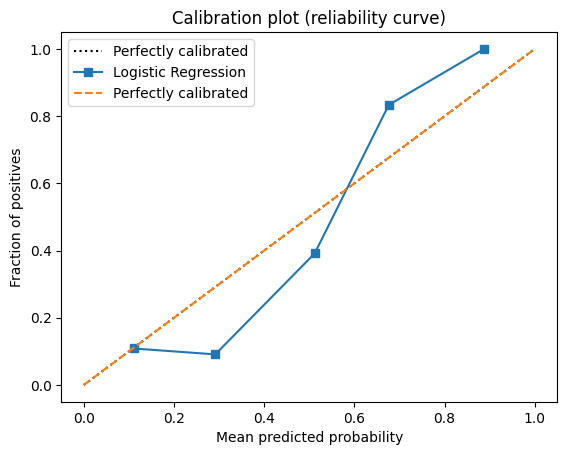

In [ ]:
from sklearn.calibration import calibration_curve

y_probs_lr = model_lr.predict_proba(X_test)[:, 1]

prob_true, prob_pred = calibration_curve(y_test, y_probs_lr, n_bins=10)

fig, ax = plt.subplots()
CalibrationDisplay.from_predictions(y_test, y_probs_lr, ax=ax, name='Logistic Regression')
ax.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
ax.set(title='Calibration plot (reliability curve)', xlabel='Mean predicted probability', ylabel='Fraction of positives')
plt.legend()
plt.show()